# Predicting Review rating from review text

# <span style="color:dodgerblue"> Naive Bayes Classifier Using 5 Classes (1,2,3,4 and 5 Rating)</span>

In [1]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [4]:
# Importing the reviews dataset
reviews_dataset = pd.read_csv('reviews_restaurants_text.csv')

In [5]:
# Creating X and Y for the classifier. X is the review text and Y is the rating
x = reviews_dataset['text']
y = reviews_dataset['stars']

In [6]:
# Text preprocessing
import string
def text_preprocessing(text):
    no_punctuation = [ch for ch in text if ch not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [w for w in no_punctuation.split() if w.lower() not in stopwords.words('english')]


In [7]:
%%time
# Estimated time: 30 min

# Vectorization
# Converting each review into a vector using bag-of-words approach

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(analyzer=text_preprocessing).fit(x)
x = vector.transform(x)

Wall time: 43min 59s


In [8]:
# Spitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle =False)

# Building Multinomial Naive Bayes modle and fit it to our training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
# Using our trained classifier to predict the ratings from text
# Testing our model on the test set

preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
display(Y_test[:15])
print("Predicted Ratings: ",end = "")
print(preds[:15])

Actual Ratings(Stars): 

123789    4
123790    4
123791    5
123792    4
123793    5
123794    5
123795    4
123796    5
123797    4
123798    5
123799    1
123800    5
123801    4
123802    4
123803    5
Name: stars, dtype: int64

Predicted Ratings: [5 5 4 5 5 5 5 5 5 5 1 5 5 5 5]


## Evaluating the model

## <span style="color:orangered"> Accuracy </span>

In [10]:
# Accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, preds)

0.6642109344707251

## <span style="color:orangered"> Precision and Recall of the model</span>

In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(Y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(Y_test,preds, average='weighted')))

Precision: 0.624972643164
Recall: 0.664210934471


## <span style="color:orangered"> Classification Report </span>

In [12]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, preds))
print('\n')
print(classification_report(Y_test, preds))

[[ 2111    60   193   203   246]
 [  572    76   389   422   232]
 [  229    39   623  1237   494]
 [  116    19   168  2420  3865]
 [  151    38    70  1649 15326]]


             precision    recall  f1-score   support

          1       0.66      0.75      0.70      2813
          2       0.33      0.04      0.08      1691
          3       0.43      0.24      0.31      2622
          4       0.41      0.37      0.39      6588
          5       0.76      0.89      0.82     17234

avg / total       0.62      0.66      0.63     30948



## <span style="color:orangered">Confusion Matrix of the model</span>

In [13]:
# citation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 2111    60   193   203   246]
 [  572    76   389   422   232]
 [  229    39   623  1237   494]
 [  116    19   168  2420  3865]
 [  151    38    70  1649 15326]]


Normalized confusion matrix
[[ 0.75  0.02  0.07  0.07  0.09]
 [ 0.34  0.04  0.23  0.25  0.14]
 [ 0.09  0.01  0.24  0.47  0.19]
 [ 0.02  0.    0.03  0.37  0.59]
 [ 0.01  0.    0.    0.1   0.89]]


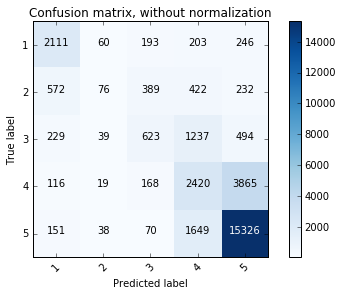

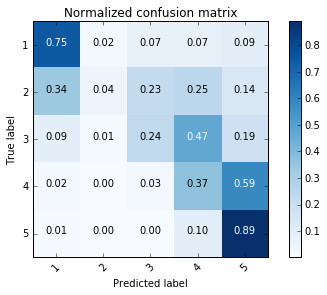

In [14]:
from sklearn import metrics
class_names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, preds
                                     )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# <span style="color:dodgerblue"> Naive Bayes Classifier Using 2 Classes <span style="color:dodgerblue"> (1 and 5 Rating: Positive & Negative Reviews)</span>

In [42]:
# Importing the datasets
reviews = pd.read_csv('reviews_restaurants_text.csv')
reviews['text'] = reviews['text'].str[2:-2]

# Reducing the dataset to 2 classes i.e 1 and 5 star rating
reviews['stars'][reviews.stars == 3] = 1
reviews['stars'][reviews.stars == 2] = 1
reviews['stars'][reviews.stars == 4] = 5

#Undersampling of the dataset to get a balanced dataset
review1 = reviews[reviews['stars'] == 1]
review5 = reviews[reviews['stars'] == 5][0:34062]
frames = [review1, review5]
reviews = pd.concat(frames)

In [43]:
# Creating X and Y for the classifier. X is the review text and Y is the rating
x2 = reviews['text']
y2 = reviews['stars']

In [44]:
# Vectorization
# Converting each review into a vector using bag-of-words approach

from sklearn.feature_extraction.text import CountVectorizer
vector2 = CountVectorizer(analyzer=text_preprocessing).fit(x2)
x2 = vector.transform(x2)

In [45]:
# Spitting data into training and test set
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.20, random_state=0)

In [46]:
# Building Multinomial Naive Bayes modle and fit it to our training set
from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(X2_train, Y2_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
# Testing our model on the test set
Y2_pred = classifier2.predict(X2_test)

## <span style="color:orangered"> Classification Report </span>

In [48]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y2_test, Y2_pred))
print('\n')
print(classification_report(Y2_test, Y2_pred))

[[6232  821]
 [ 815 6112]]


             precision    recall  f1-score   support

          1       0.88      0.88      0.88      7053
          5       0.88      0.88      0.88      6927

avg / total       0.88      0.88      0.88     13980



## <span style="color:orangered"> Accuracy of the model </span>

In [49]:

# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y2_test, Y2_pred)

0.88297567954220313

## <span style="color:orangered"> Precision and Recall of the model</span>

In [50]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(Y2_test, Y2_pred, average='weighted')))
print ('Recall: ' + str(recall_score(Y2_test, Y2_pred, average='weighted')))

Precision: 0.882976867141
Recall: 0.882975679542


## <span style="color:orangered"> Confusion Matrix of the model </font>

Confusion matrix, without normalization
[[6232  821]
 [ 815 6112]]


Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.12  0.88]]


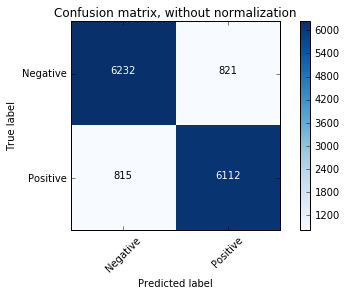

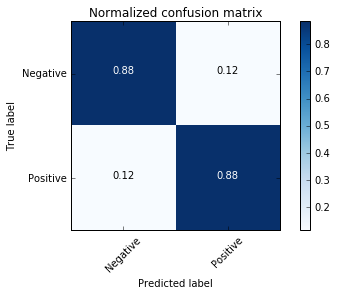

In [51]:
class_names = ['Negative','Positive']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y2_test, Y2_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()